In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.stats.oneway as oneway

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [11]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Is there a significant difference between mpg in American cars, Europeаn cars and Japanеsе cars which have 4 cylinders?

In [12]:
data.groupby(["origin", "cylinders"]).mean()["mpg"]

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

In [13]:
europe_mpg = data[(data["origin"]=="europe") & (data["cylinders"]== 4)]["mpg"]
japan_mpg = data[(data["origin"]=="japan") & (data["cylinders"]== 4)]["mpg"]
usa_mpg = data[(data["origin"]=="usa") & (data["cylinders"]== 4)]["mpg"]

1. Check data for normality:

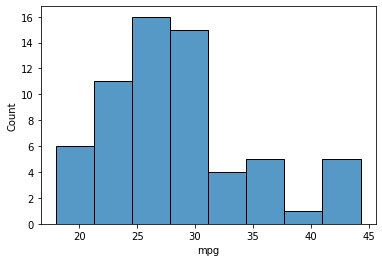

In [14]:
sns.histplot(data = europe_mpg)
plt.show()

In [15]:
stats.shapiro(europe_mpg)

ShapiroResult(statistic=0.9273528456687927, pvalue=0.001131328521296382)

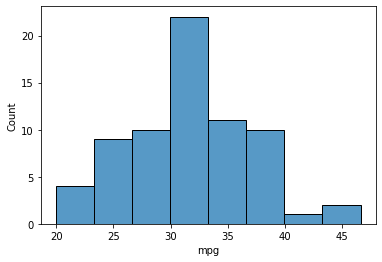

In [16]:
sns.histplot(data = japan_mpg)
plt.show()

In [17]:
stats.shapiro(japan_mpg)

ShapiroResult(statistic=0.9816121459007263, pvalue=0.4037412703037262)

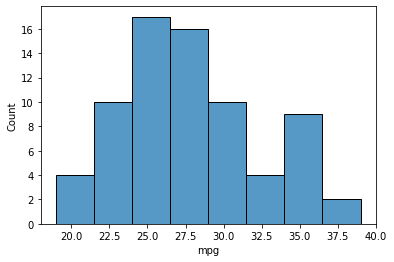

In [18]:
sns.histplot(data = usa_mpg)
plt.show()

In [19]:
stats.shapiro(usa_mpg)

ShapiroResult(statistic=0.9675743579864502, pvalue=0.059960294514894485)

Results: mpg for European cars don't follow normal distribution.

2. Check homogeneity of variances:

<AxesSubplot:xlabel='origin', ylabel='mpg'>

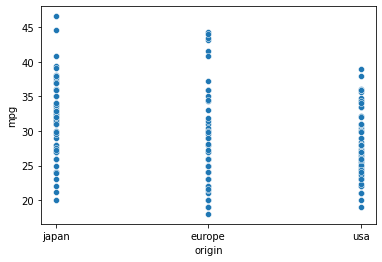

In [46]:
data_4 = data[data["cylinders"]== 4]
sns.scatterplot(data = data_4, x = "origin", y = "mpg")

In [39]:
stats.fligner(europe_mpg, japan_mpg, usa_mpg)

FlignerResult(statistic=3.3889253166017324, pvalue=0.18369791106001443)

pvalue is grater than 0.05 --> we don't have enough evidence to accept H1 hypothesis that variances are not homogeneity.

Conclusions: for our data we have non-normal data and homogeneity of variances. We should use Kruskal-Wallis Test: H0 = sigm1 = sigma2= sigma3; H1- at least one of the variances is different.

In [40]:
stats.kruskal(europe_mpg, japan_mpg, usa_mpg)

KruskalResult(statistic=19.86882907786034, pvalue=4.8477318028384935e-05)

Results: We accept H1 that at least one of the variances is different.

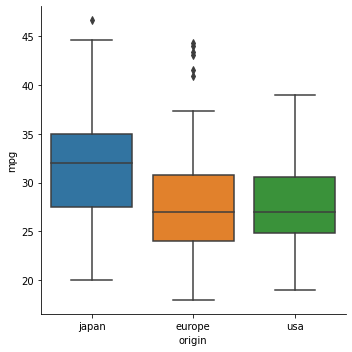

In [47]:
sns.catplot(data = data_4, x = "origin", y = "mpg", kind = "box")